In [2]:
from pathlib import Path
from book_loader import BookLoader
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

In [2]:
with open('parameters.json', 'r', encoding="utf-8") as json_file:
    params = json.load(json_file)

book = BookLoader(**params)

observed_lengths = [len(c) for c in book.chapters]
expected_lengths = [43, 101, 152, 136, 271, 307, 23]

chapters: list[list[str]] = book.chapters

In [3]:
df = pd.DataFrame(data={"chapters": range(len(chapters))})

def count_words(i):
    return sum(map(lambda p: len(p.split()), chapters[i]))

df["words"] = df["chapters"].apply(count_words)
                      

def count_unique_words(i):
    return len(set('\n'.join(chapters[i]).split()))

df["unique_words"] = df["chapters"].apply(count_unique_words)


def count_stop_words(p):
    return sum(1 for w in p.split() if w in fr_stop)

df["stop_words"] = df["chapters"].apply(
    lambda i: sum(map(count_stop_words, chapters[i])))


# def count_bisections(p):
#     return len(bisection_pat.findall(p))

# bisection_pat = re.compile(r"([A-Za-z]+)-\s([A-Za-z]+)")
# df["bisected_words"] = df["chapters"].apply(
#     lambda i: sum(map(count_bisections, chapters[i])))


df.style.hide(axis='index')

chapters,words,unique_words,stop_words
0,4611,1733,2105
1,7270,2339,3335
2,10104,2987,4518
3,10565,3233,4798
4,13234,4055,6168
5,14365,3947,6530
6,1641,744,783


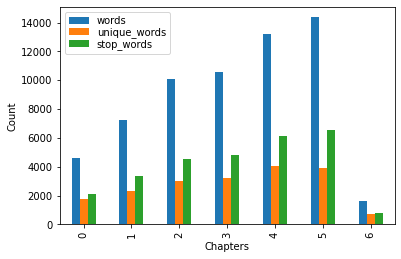

In [4]:
bar_plot = df.iloc[:, 1:].plot.bar(xlabel="Chapters", ylabel="Count")
plt.legend(loc='best', labelspacing=0.1)
fig = plt.gcf()

In [5]:
fig.savefig("stats.jpg")

## Discussion
### Results comparison with works in similar spaces

In [40]:
model_names = ["TextRank-CamemBERT_on_3S", # 3S = "Stress, santé et sécurité au travail"
               "TextRank_on_ML-SUM",
               "HEPOS_on_GovReport",
               "TextRank-BART_on_Amicus",
               "GPT-2-BART_on_Amicus"]

In [41]:
results_df = pd.DataFrame(data={
    "models": model_names,
    "R-1": [59.38,     0, 56.86, 45.10, 47.07],
    "R-2": [27.68,     0, 22.62, 15.51, 17.64],
    "R-L": [57.65,  12.6, 53.82, 18.74, 24.40]})

results_df

,models,R-1,R-2,R-L
0,TextRank-CamemBERT_on_3S,59.38,27.68,57.65
1,TextRank_on_ML-SUM,0.00,0.00,12.60
2,HEPOS_on_GovReport,56.86,22.62,53.82
3,TextRank-BART_on_Amicus,45.10,15.51,18.74
4,GPT-2-BART_on_Amicus,47.07,17.64,24.40


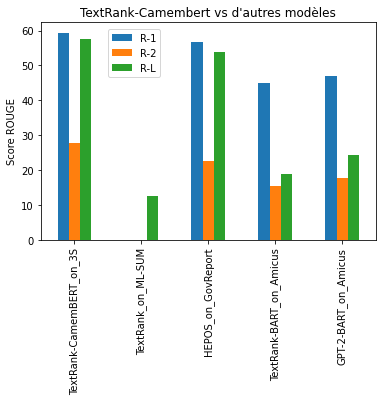

In [55]:
f = plt.figure()
plt.title("TextRank-Camembert vs d'autres modèles", color='black')
results_df.plot(kind='bar', ax=f.gca(), ylabel="Score ROUGE").set_xticklabels(model_names)
plt.legend(loc=(0.2, 0.75))
plt.show()

# f.savefig("comparison.jpg") # crops x labels. Just screenshot it instead.